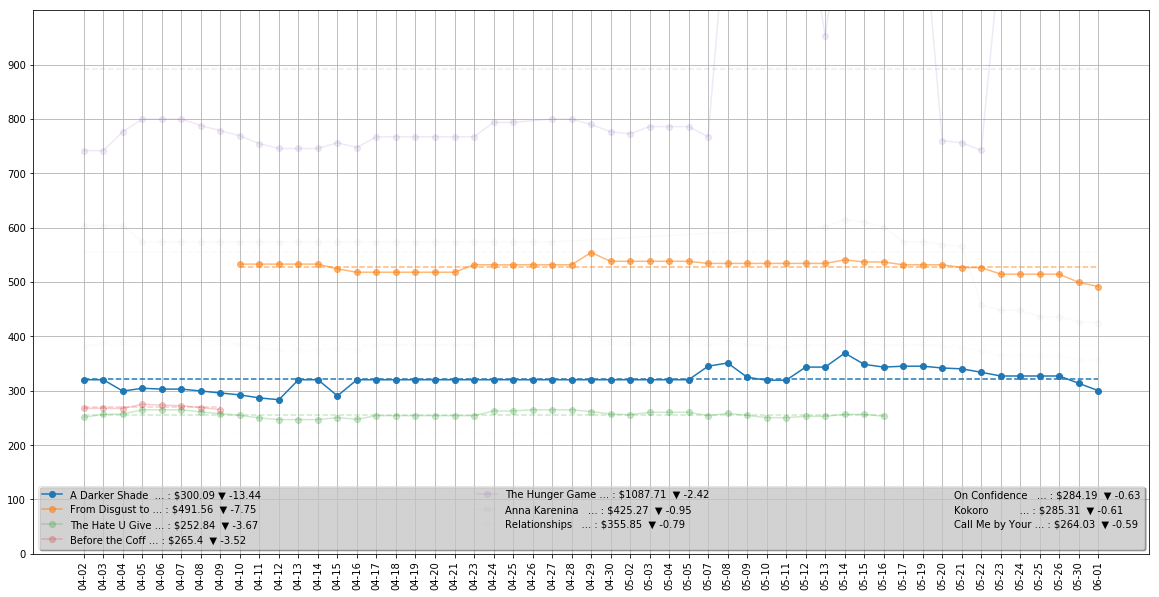

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
df = pd.read_csv('./priceData.csv') 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.ylim((0,1000))
plt.yticks(range(0,1000,100))
plt.grid(True)

NUM_LINES = 10

titlesMap = {title : [[],[]] for title in df['title'].unique()}
for row in df.iterrows():
    title = row[1]['title']
    titlesMap[title][0].append(row[1]['price'])
    titlesMap[title][1].append(row[1]['date'])

mostChange = Counter()
for key, val in titlesMap.items():
    priceDelta = titlesMap[key][0][-2] - titlesMap[key][0][-1] if len(titlesMap[key][0])>2 else 0
    if priceDelta != 0:
        mostChange[key] = priceDelta

deltas = [delta for title, delta in mostChange.most_common(len(mostChange))]
deltas = np.array(deltas).reshape(-1,1)
scaler = MinMaxScaler((0,1))
deltas = scaler.fit_transform(deltas[:NUM_LINES]) 
deltas = [x[0] if x[0]<1 else 1 for x in deltas]
cmap = plt.get_cmap('tab10')
for i, item in enumerate(mostChange.most_common(NUM_LINES)): 
    title = item[0]
    prices = titlesMap[title][0]
    dates = titlesMap[title][1]
    dates = [x[5:] for x in dates]
    priceDelta = (prices[-1] - prices[-2]) if len(prices) > 2 else 0
    dev = 10 * np.std(prices)/np.mean(prices)
    dev = 1 if dev > 1 else dev
    label = (('▲' if (priceDelta > 0 ) else '▼ ') + '{:.2f}'.format(priceDelta)) 
    label = f'{title[:15].ljust(16)}... : ${prices[-1]} {label.rjust(8)}'
    color = cmap(float(i/NUM_LINES))
    if np.mean(prices) > prices[-1]:
        plt.plot(dates,prices, linestyle='-', alpha = deltas[i] ,marker = 'o', label = label, color= color)
        plt.plot(dates,[np.mean(prices) for x in prices],alpha = deltas[i], linestyle='--',color = color )
plt.xticks(dates,rotation='vertical')
leg = plt.legend(loc= 'lower center',mode='expand',ncol = 3,shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
fig.savefig('todaysPlot.png',transparent=True)